<a href="https://colab.research.google.com/github/EugeneStrakhov86/data-science/blob/master/Image_flow_(%2B_LASA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Find images in a folder, add metadata

In [2]:
%%time

import os
import json
import pandas as pd

# Define the folder paths in Google Drive
images_path = '/content/drive/MyDrive/Data Science/CatAI/download'
metadata_path = '/content/drive/MyDrive/Data Science/CatAI/metadata'

# Define the file extensions for images
IMAGE_EXTENSIONS = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'}

def get_image_files(images_path, metadata_path):

    """
    Iterates over image files in a specified folder in Google Drive.

    Args:
        images_path (str): Path to the images folder in Google Drive.
        metadata_path (str): Path to the metadata folder in Google Drive.

    Returns:
        dict: Dictionary with image files and corresponding metadata.
    """

    image_files = {'images': [], 'metadata': []}

    for root, _, files in os.walk(images_path):
        for file in files:
            if os.path.splitext(file)[1].lower() in IMAGE_EXTENSIONS:
                image_files['images'].append(os.path.join(root, file))

    for root, _, files in os.walk(metadata_path):
        for file in files:
            image_files['metadata'].append(os.path.join(root, file))

    images = {}

    for image_file in image_files['images']:
        file_name = image_file.split('/')[-1]
        id = file_name.split('-image')[0] # get image id
        for metadata in image_files['metadata']:
            if id in metadata:
                # reading JSON file
                with open(metadata) as json_file:
                    images[image_file] = json.load(json_file)

    return images

# Get list of image files
image_files = get_image_files(images_path, metadata_path)

# Display the metadata
image_files[images_path + '/00bd42c9-c6c8-440e-87af-3bab36a1017e-image-0.jpg']

CPU times: user 517 ms, sys: 147 ms, total: 664 ms
Wall time: 11.6 s


{'AuthKeyCompany': 'companyCollectionData',
 'Datetime': '2024-10-21T10:33:34.280Z',
 'UserID': 'userCollectionData',
 'CatNumber': '0',
 'Barcode': '0',
 'ORImage': 'CatAI-LASA',
 'ProductName': 'hCRH «\xa0TANABE\xa0» Injection 100 mcg',
 'ProductDosage': '100mcg',
 'IntakeMethod': 'IV:Intravenous Use',
 'Category': 'Ampoules',
 'Manufacturer': 'NIPRO ES PHARMA',
 'TypePackaging': 'Vial',
 'ImageSource': 'Camera',
 'ProductNameGeneric': 'corticorelin',
 'ProductActiveIngredient': '',
 'ManufacturingCountry': 'Japan',
 'CountryRegistration': 'Israel',
 'sessionID': '00bd42c9-c6c8-440e-87af-3bab36a1017e'}

## Get dataframe

In [3]:
image_df = pd.DataFrame.from_dict(image_files, orient='index')
image_df['image_id'] = image_df.index.str.split('/').str[-1].str.split('-image').str[0]
image_df = image_df.reset_index()
image_df = image_df.rename({'index': 'filename'}, axis=1)
image_df.head()

,filename,AuthKeyCompany,Datetime,UserID,CatNumber,Barcode,ORImage,ProductName,ProductDosage,IntakeMethod,...,ImageSource,ProductNameGeneric,ProductActiveIngredient,ManufacturingCountry,CountryRegistration,sessionID,userId,device,location,image_id
0,/content/drive/MyDrive/Data Science/CatAI/down...,companyCollectionData,2024-10-21T10:33:34.280Z,userCollectionData,0,0,CatAI-LASA,hCRH « TANABE » Injection 100 mcg,100mcg,IV:Intravenous Use,...,Camera,corticorelin,,Japan,Israel,00bd42c9-c6c8-440e-87af-3bab36a1017e,NaN,NaN,NaN,00bd42c9-c6c8-440e-87af-3bab36a1017e
1,/content/drive/MyDrive/Data Science/CatAI/down...,companyCollectionData,2024-10-07T07:24:14.616Z,userCollectionData,"7290000812342, D","7290000812342, D",CatAI-LASA,Fluphenazinedecanoate,25mg/ml,IM,...,Camera,Fluphenazinedecanoate,Fluphenazinedecanoate,Israel,Israel,0158a08f-cdee-44c8-9a93-37f0b6b48e69,NaN,NaN,NaN,0158a08f-cdee-44c8-9a93-37f0b6b48e69
2,/content/drive/MyDrive/Data Science/CatAI/down...,companyCollectionData,2024-10-21T10:33:34.280Z,userCollectionData,0,0,CatAI-LASA,hCRH « TANABE » Injection 100 mcg,100mcg,IV:Intravenous Use,...,Camera,corticorelin,,Japan,Israel,00bd42c9-c6c8-440e-87af-3bab36a1017e,NaN,NaN,NaN,00bd42c9-c6c8-440e-87af-3bab36a1017e
3,/content/drive/MyDrive/Data Science/CatAI/down...,companyCollectionData,2024-10-07T07:24:14.616Z,userCollectionData,"7290000812342, D","7290000812342, D",CatAI-LASA,Fluphenazinedecanoate,25mg/ml,IM,...,Camera,Fluphenazinedecanoate,Fluphenazinedecanoate,Israel,Israel,0158a08f-cdee-44c8-9a93-37f0b6b48e69,NaN,NaN,NaN,0158a08f-cdee-44c8-9a93-37f0b6b48e69
4,/content/drive/MyDrive/Data Science/CatAI/down...,companyCollectionData,2024-10-21T10:33:34.280Z,userCollectionData,0,0,CatAI-LASA,hCRH « TANABE » Injection 100 mcg,100mcg,IV:Intravenous Use,...,Camera,corticorelin,,Japan,Israel,00bd42c9-c6c8-440e-87af-3bab36a1017e,NaN,NaN,NaN,00bd42c9-c6c8-440e-87af-3bab36a1017e


In [4]:
image_df[image_df['filename'].str.contains('00bd42c9-c6c8-440e-87af-3bab36a1017e')]

,filename,AuthKeyCompany,Datetime,UserID,CatNumber,Barcode,ORImage,ProductName,ProductDosage,IntakeMethod,...,ImageSource,ProductNameGeneric,ProductActiveIngredient,ManufacturingCountry,CountryRegistration,sessionID,userId,device,location,image_id
0,/content/drive/MyDrive/Data Science/CatAI/down...,companyCollectionData,2024-10-21T10:33:34.280Z,userCollectionData,0,0,CatAI-LASA,hCRH « TANABE » Injection 100 mcg,100mcg,IV:Intravenous Use,...,Camera,corticorelin,,Japan,Israel,00bd42c9-c6c8-440e-87af-3bab36a1017e,NaN,NaN,NaN,00bd42c9-c6c8-440e-87af-3bab36a1017e
2,/content/drive/MyDrive/Data Science/CatAI/down...,companyCollectionData,2024-10-21T10:33:34.280Z,userCollectionData,0,0,CatAI-LASA,hCRH « TANABE » Injection 100 mcg,100mcg,IV:Intravenous Use,...,Camera,corticorelin,,Japan,Israel,00bd42c9-c6c8-440e-87af-3bab36a1017e,NaN,NaN,NaN,00bd42c9-c6c8-440e-87af-3bab36a1017e
4,/content/drive/MyDrive/Data Science/CatAI/down...,companyCollectionData,2024-10-21T10:33:34.280Z,userCollectionData,0,0,CatAI-LASA,hCRH « TANABE » Injection 100 mcg,100mcg,IV:Intravenous Use,...,Camera,corticorelin,,Japan,Israel,00bd42c9-c6c8-440e-87af-3bab36a1017e,NaN,NaN,NaN,00bd42c9-c6c8-440e-87af-3bab36a1017e


## Get image dict

In [5]:
image_df = image_df.iloc[:100, :]

In [6]:
images_dict = image_df.groupby('image_id').apply(lambda x: x.to_dict(orient='records'), include_groups=False).to_dict()
print(images_dict['00bd42c9-c6c8-440e-87af-3bab36a1017e'])
print(len(images_dict['00bd42c9-c6c8-440e-87af-3bab36a1017e']))

[{'filename': '/content/drive/MyDrive/Data Science/CatAI/download/00bd42c9-c6c8-440e-87af-3bab36a1017e-image-0.jpg', 'AuthKeyCompany': 'companyCollectionData', 'Datetime': '2024-10-21T10:33:34.280Z', 'UserID': 'userCollectionData', 'CatNumber': '0', 'Barcode': '0', 'ORImage': 'CatAI-LASA', 'ProductName': 'hCRH «\xa0TANABE\xa0» Injection 100 mcg', 'ProductDosage': '100mcg', 'IntakeMethod': 'IV:Intravenous Use', 'Category': 'Ampoules', 'Manufacturer': 'NIPRO ES PHARMA', 'TypePackaging': 'Vial', 'ImageSource': 'Camera', 'ProductNameGeneric': 'corticorelin', 'ProductActiveIngredient': '', 'ManufacturingCountry': 'Japan', 'CountryRegistration': 'Israel', 'sessionID': '00bd42c9-c6c8-440e-87af-3bab36a1017e', 'userId': nan, 'device': nan, 'location': nan}, {'filename': '/content/drive/MyDrive/Data Science/CatAI/download/00bd42c9-c6c8-440e-87af-3bab36a1017e-image-1.jpg', 'AuthKeyCompany': 'companyCollectionData', 'Datetime': '2024-10-21T10:33:34.280Z', 'UserID': 'userCollectionData', 'CatNumber

# Img2Vec class

In [7]:
%pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 26.7 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [8]:
!pip install ultralytics opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 12.0 MB/s eta 0:00:00


In [ ]:
# import torch
# import torchvision
# from torchvision import transforms
# import albumentations as A
# from PIL import Image
# from ultralytics import YOLO
# import numpy as np
# import matplotlib.pyplot as plt

# torch.manual_seed(2024)

In [ ]:
# class Img2VecResnet18():
#     def __init__(self, batch_size=64, augment_prob=0.5):
#         self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#         self.numberFeatures = 512
#         self.modelName = "resnet-18"
#         self.model, self.featureLayer = self.getFeatureLayer()
#         self.model = self.model.to(self.device)
#         self.model.eval()
#         self.toTensor = transforms.ToTensor()
#         self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#         self.batch_size = batch_size
#         self.augment_prob = augment_prob

#         # Load YOLO model
#         self.yolo_model = YOLO('yolo11l.pt')

#         self.augmentation = A.Compose(
#             [
#                 A.Rotate(limit=15, p=0.7),
#                 A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.05, p=0.5),
#                 A.GaussianBlur(blur_limit=(3, 7), sigma_limit=(0.1, 2.0), p=0.4),
#                 A.HorizontalFlip(p=0.5),
#                 A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.3), p=0.3),
#             ],
#             additional_targets={'image': 'image'}
#         )

#     def getFeatureLayer(self):
#         cnnModel = torchvision.models.resnet18(pretrained=True)
#         layer = cnnModel._modules.get('avgpool')
#         self.layer_output_size = 512
#         return cnnModel, layer

#     def preprocess_image(self, image, aug=False):
#         image = np.array(image)
#         if aug:
#             augmented = self.augmentation(image=image)
#             image = augmented["image"]

#         transformationForCNNInput = transforms.Compose([
#             transforms.ToPILImage(),
#             transforms.Resize((224, 224)),
#             transforms.ToTensor()
#         ])
#         image = transformationForCNNInput(image)
#         return self.normalize(image).unsqueeze(0).to(self.device)

#     def getVectors(self, images, aug=False):
#         images = self.preprocess_image(images, aug=aug)
#         embedding = torch.zeros(images.size(0), self.numberFeatures, 1, 1).to(self.device)

#         def copyData(m, i, o):
#             embedding.copy_(o.data)

#         h = self.featureLayer.register_forward_hook(copyData)
#         self.model(images)
#         h.remove()
#         return embedding.squeeze().cpu().numpy()

#     def detect_and_embed(self, image_path, aug=False, conf_threshold=0.25):
#         # Load image
#         image = Image.open(image_path).convert("RGB")
#         image_np = np.array(image)

#         # Run YOLO detection
#         results = self.yolo_model(image_np)

#         embeddings = []
#         for box in results[0].boxes:
#             x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
#             conf = box.conf[0]  # Confidence score
#             class_id = int(box.cls[0])  # Class ID
#             cls = f"{self.yolo_model.names[class_id]}"  # Class name

#             if conf >= conf_threshold:
#                 # Crop detected region
#                 cropped = image_np[int(y1):int(y2), int(x1):int(x2)]
#                 cropped_image = Image.fromarray(cropped)

#                 # Generate embedding
#                 embedding = self.getVectors(cropped_image, aug=aug)
#                 embeddings.append({
#                     "class": cls,
#                     "confidence": float(conf),
#                     "embedding": embedding
#                 })

#         return embeddings

In [ ]:
# # Create an instance of the Img2VecResnet18 class
# os.chdir('/content/drive/MyDrive/Data Science/CatAI')
# current_path = os.getcwd()
# img2vec = Img2VecResnet18(batch_size=64)

# # Process an image and get embeddings for detected objects
# from random import choice

# images_list = os.listdir(current_path + '/download')

# image_path = current_path + '/download/' + choice(images_list)  # Replace with your image path

# # Load and display the image
# img = plt.imread(image_path)
# plt.imshow(img)
# plt.show()
# print()

# embeddings = img2vec.detect_and_embed(image_path, aug=True)

# # Print embeddings
# for obj in embeddings:
#     print(f"Class: {obj['class']}, Confidence: {obj['confidence']}, Embedding: {obj['embedding'][:5]}...")

In [9]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00


In [10]:
import torch
import torchvision
import onnxruntime as ort
import numpy as np
from PIL import Image
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import torchvision.transforms as transforms
import cv2

In [11]:
class Img2VecResnet18:
    def __init__(self, batch_size=64, augment_prob=0.5, onnx_model_path=None):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.numberFeatures = 512
        self.modelName = "resnet-18"
        self.model, self.featureLayer = self.getFeatureLayer()
        self.model = self.model.to(self.device)
        self.model.eval()
        self.batch_size = batch_size
        self.augment_prob = augment_prob

        # Load ONNX LASA model
        self.onnx_model_path = onnx_model_path

        self.augmentation = A.Compose(
            [
                A.Rotate(limit=15, p=0.7),
                A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.05, p=0.5),
                A.GaussianBlur(blur_limit=(3, 7), sigma_limit=(0.1, 2.0), p=0.4),
                A.HorizontalFlip(p=0.5),
                A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.3), p=0.3),
            ]
        )
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

        # Define valid classes for the ONNX model
        self.classes = ["ampoule", "Box", "Vials"]

    def getFeatureLayer(self):
        cnnModel = torchvision.models.resnet18(pretrained=True)
        layer = cnnModel._modules.get('avgpool')
        self.layer_output_size = 512
        return cnnModel, layer

    def get_contours(self, input_image):
        """
        Detect objects using the ONNX LASA model and return detected contours.
        """
        model = cv2.dnn.readNetFromONNX(self.onnx_model_path)
        original_image = np.array(input_image)  # Assume input_image is a PIL Image
        height, width, _ = original_image.shape
        length = max(height, width)
        image = np.zeros((length, length, 3), np.uint8)
        image[0:height, 0:width] = original_image
        scale = length / 640

        blob = cv2.dnn.blobFromImage(image, scalefactor=1 / 255, size=(640, 640), swapRB=True)
        model.setInput(blob)
        outputs = model.forward()

        outputs = np.array([cv2.transpose(outputs[0])])
        rows = outputs.shape[1]

        boxes = []
        scores = []
        class_ids = []

        for i in range(rows):
            classes_scores = outputs[0][i][4:]
            _, maxScore, _, (x, maxClassIndex) = cv2.minMaxLoc(classes_scores)
            if maxScore >= 0.25:
                box = [
                    outputs[0][i][0] - (0.5 * outputs[0][i][2]),
                    outputs[0][i][1] - (0.5 * outputs[0][i][3]),
                    outputs[0][i][2],
                    outputs[0][i][3]
                ]
                boxes.append(box)
                scores.append(maxScore)
                class_ids.append(maxClassIndex)

        result_boxes = cv2.dnn.NMSBoxes(boxes, scores, 0.25, 0.45, 0.5)

        detections = []
        if len(result_boxes) > 0:
            for i in range(len(result_boxes)):
                index = result_boxes[i]
                box = boxes[index]
                detection = {
                    'class_id': class_ids[index],
                    'class_name': self.classes[class_ids[index]],
                    'confidence': scores[index],
                    'box': box,
                    'scale': scale,
                    'rect': [
                        round(box[0] * scale),
                        round(box[1] * scale),
                        round(box[2] * scale),
                        round(box[3] * scale)
                    ]
                }
                detections.append(detection)

        return detections

    def detect_and_crop(self, input_image):
        """
        Detect and crop the largest object using the ONNX LASA model.
        If no object is detected, return the original image.
        """
        detections = self.get_contours(input_image)
        if detections:
            # Find the largest detected object
            largest_detection = max(detections, key=lambda d: d['rect'][2] * d['rect'][3])
            x1, y1, w, h = largest_detection['rect']
            x2, y2 = x1 + w, y1 + h

            # Crop the image
            try:
                cropped_image = input_image.crop((x1, y1, x2, y2))  # For PIL images
            except:
                # For numpy arrays (OpenCV images), cropping might be different
                rect = largest_detection['rect']
                cropped_image = input_image[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]  # For OpenCV images
            return cropped_image
        else:
            # If no detection, return the original image
            return input_image

    def preprocess_image(self, image, aug=False):
          """
          Preprocess image: detect, crop, pad, resize, augment, normalize.
          The resulting image will always have size 224x224.
          """
          # Detect and crop
          cropped_image = self.detect_and_crop(image)

          # Convert the image to a NumPy array
          image_np = np.array(cropped_image)

          # Ensure the image is not empty after cropping
          if image_np.size == 0:
              image_np = np.array(image)

          # Resize and pad to 224x224
          transformation_resize_pad = A.Compose([
              A.LongestMaxSize(max_size=224),
              A.PadIfNeeded(min_height=224, min_width=224, border_mode=0, value=[0, 0, 0])
          ])
          resized_padded_image = transformation_resize_pad(image=image_np)["image"]

          # Apply augmentations if required
          if aug:
              augmented = self.augmentation(image=resized_padded_image)
              resized_padded_image = augmented["image"]

          # Convert the final image to tensor and normalize
          image_tensor = transforms.ToTensor()(resized_padded_image)
          normalized_tensor = self.normalize(image_tensor).unsqueeze(0)

          return normalized_tensor.to(self.device)

    # def preprocess_image(self, image, aug=False):
    #     """
    #     Preprocess image: detect, crop, pad, resize, augment, normalize.
    #     """
    #     # Detect and crop
    #     image = self.detect_and_crop(image)

    #     # Resize and pad
    #     transformation_resize_pad = A.Compose([
    #         A.LongestMaxSize(max_size=224),
    #         A.PadIfNeeded(min_height=224, min_width=224, border_mode=0, value=[0, 0, 0])
    #     ])
    #     image_np = np.array(image)

    #     # Ensure the image is not empty before proceeding
    #     if image_np.size == 0:
    #         raise ValueError("The image is empty after cropping!")

    #     resized_image = transformation_resize_pad(image=image_np)["image"]

    #     # Apply augmentations if required
    #     if aug:
    #         augmented = self.augmentation(image=resized_image)
    #         image_np = augmented["image"]

    #     # Convert to tensor and normalize
    #     image_tensor = transforms.ToTensor()(image_np)
    #     normalized_tensor = self.normalize(image_tensor).unsqueeze(0)

    #     return normalized_tensor.to(self.device)

    def getVectors(self, image, aug=False):
        image_tensor = self.preprocess_image(image, aug=aug)
        embedding = torch.zeros(image_tensor.size(0), self.numberFeatures, 1, 1).to(self.device)

        def copyData(m, i, o):
            embedding.copy_(o.data)

        h = self.featureLayer.register_forward_hook(copyData)
        self.model(image_tensor)
        h.remove()
        return embedding.squeeze().cpu().numpy()

In [12]:
# Initialize the class with ONNX LASA model path
lasa_model_path = '/content/drive/MyDrive/Data Science/CatAI/LASAOD.onnx'
img2vec = Img2VecResnet18(
    batch_size=64,
    augment_prob=0.5,
    onnx_model_path=lasa_model_path
)

# Process an image and get embeddings
image_path = '/content/drive/MyDrive/Data Science/CatAI/download/00bd42c9-c6c8-440e-87af-3bab36a1017e-image-0.jpg'
img = Image.open(image_path).convert("RGB")
embeddings = img2vec.getVectors(img, aug=False)
print("Embeddings original:", embeddings[:10])

for _ in range(3):
    embeddings = img2vec.getVectors(img, aug=True)
    print("Embeddings augmented:", embeddings[:10])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 208MB/s]


Embeddings original: [0.90173715 0.7547709  0.8312734  1.9275432  0.5860955  0.12027436
 0.89767504 0.12330671 1.0648375  0.75519097]
Embeddings augmented: [0.9325231  0.7178826  0.70937777 1.5570022  0.2756174  0.08160821
 0.47697005 1.2442484  0.450476   1.4091567 ]
Embeddings augmented: [0.41052604 0.9094285  1.1864681  2.7189696  0.7300468  0.01343351
 0.46693358 0.5220329  0.76667356 0.98978627]
Embeddings augmented: [0.6196679  0.83691096 0.39815482 1.6543459  0.09174907 0.13556056
 0.9095513  0.42650807 1.2015233  0.75609076]


# Debugging

In [13]:
# Get product name by image path
def get_product_name(img_path, images_dict):
    image_id = img_path.split('/')[-1].split('-image')[0]
    image_files = images_dict[image_id]
    for img_file in image_files:
        if img_file['filename'] == img_path:
            return img_file['ProductName']

In [14]:
def denormalize_and_display(image):
    # Denormalize the image
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = (image * std) + mean  # Reverse normalization
    image = np.clip(image, 0, 1)  # Clip values to [0, 1] range

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()


hCRH « TANABE » Injection 100 mcg


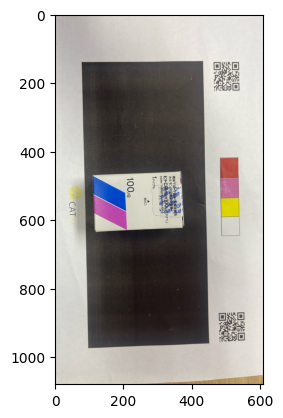


Image after preprocessing:


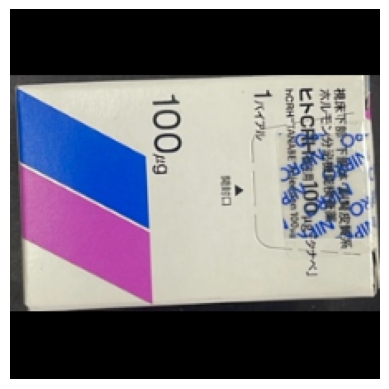


Augmented image:


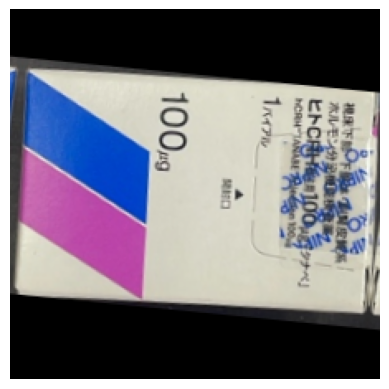

original embedding: [0.90173715 0.7547709  0.8312734  1.9275432  0.5860955  0.12027436
 0.89767504 0.12330671 1.0648375  0.75519097]

normalized embedding: [0.04052147 0.03391723 0.03735503 0.08661824 0.02633744 0.00540478
 0.04033893 0.00554105 0.04785073 0.03393611]

original embedding after augmentation: [1.0671792e+00 4.7110230e-02 1.4975256e+00 1.4287927e+00 6.6746317e-04
 7.7266172e-03 5.3539640e-01 0.0000000e+00 1.7341337e+00 2.2592874e+00]

normalized embedding after augmentation: [3.6993343e-02 1.6330574e-03 5.1911127e-02 4.9528532e-02 2.3137345e-05
 2.6784011e-04 1.8559303e-02 0.0000000e+00 6.0113054e-02 7.8317299e-02]


In [15]:
import matplotlib.pyplot as plt

# Process and show the image
def process_image(img_path, images_dict):

    # Create an instance of the img2vec model from above class
    img2vec = Img2VecResnet18(batch_size=64, onnx_model_path=lasa_model_path)

    # Load and display the image
    img = plt.imread(img_path)
    img_product_name = get_product_name(img_path, images_dict)
    print()
    print(img_product_name)
    plt.imshow(img)
    plt.show()

    # # Preprocess the image
    # img = Image.open(img_path).convert("RGB")
    # preprocessed_img = img2vec.preprocess_image(img, aug=False)

    # Preprocess image
    print('\nImage after preprocessing:')
    img = Image.open(img_path).convert("RGB")
    preprocessed_img = img2vec.preprocess_image(img, aug=False).cpu().numpy().squeeze(0).transpose(1, 2, 0)
    # plt.imshow(preprocessed_img.clip(0, 1))
    # plt.show()
    denormalize_and_display(preprocessed_img)

    # Augment image
    print('\nAugmented image:')
    augmented_img = img2vec.preprocess_image(img, aug=True).cpu().numpy().squeeze(0).transpose(1, 2, 0)
    # plt.imshow(augmented_img.clip(0, 1))
    # plt.show()
    denormalize_and_display(augmented_img)

    # # Preprocess and augment the image
    # img = Image.open(img_path).convert("RGB")
    # preprocessed_img = img2vec.preprocess_image(img, aug=True)
    # augmented_img = preprocessed_img.cpu().numpy().squeeze(0).transpose(1, 2, 0)

    # # Denormalize the image
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    # augmented_img = (augmented_img * std) + mean  # Reverse normalization
    # augmented_img = np.clip(augmented_img, 0, 1)  # Clip values to [0, 1] range

    # # Display the image
    # plt.imshow(augmented_img)
    # plt.axis('off')
    # plt.show()

    # Get vector
    embedding = img2vec.getVectors(img, aug=False)
    print('original embedding:', embedding[:10])
    print()

    # Normalize vector
    normalized_embedding = embedding / np.linalg.norm(embedding)
    print('normalized embedding:', normalized_embedding[:10])
    print()

    # Get vector
    embedding_aug = img2vec.getVectors(augmented_img, aug=False)
    print('original embedding after augmentation:', embedding_aug[:10])
    print()

    # Normalize vector
    normalized_embedding_aug = embedding_aug / np.linalg.norm(embedding_aug)
    print('normalized embedding after augmentation:', normalized_embedding_aug[:10])

    # # for _ in range(10):
    # #     new_img = img2vec.preprocess_image(img, aug=True).cpu().numpy()
    # #     plt.imshow(np.transpose(new_img.squeeze(0)))
    # #     plt.show()

image_path = '/content/drive/MyDrive/Data Science/CatAI/download/00bd42c9-c6c8-440e-87af-3bab36a1017e-image-0.jpg'
process_image(image_path, images_dict)

# Play with augmentations


hCRH « TANABE » Injection 100 mcg


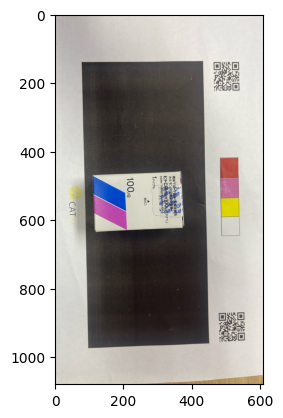

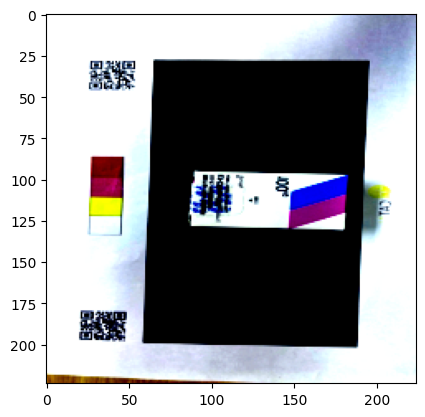

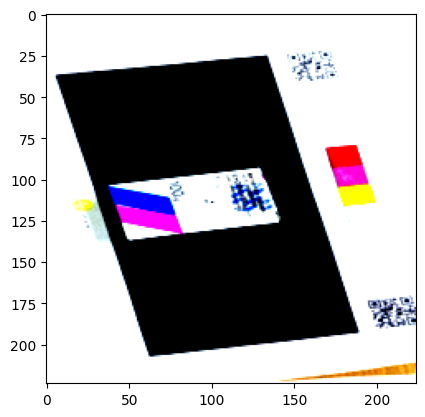

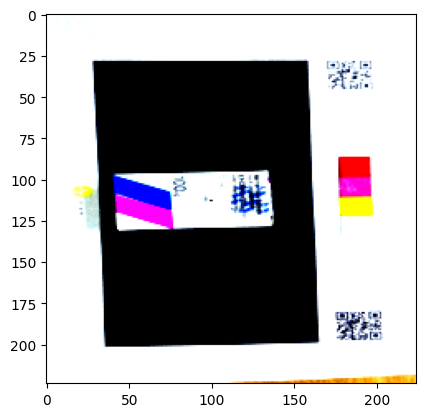

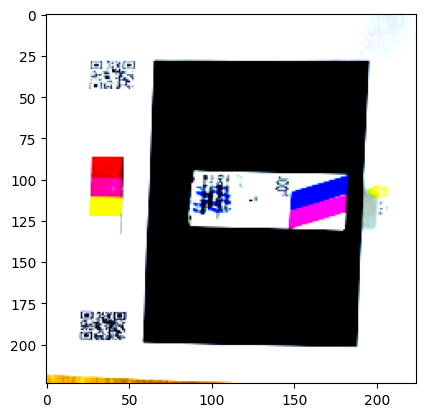

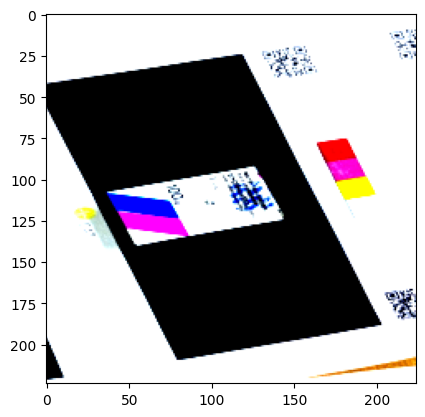

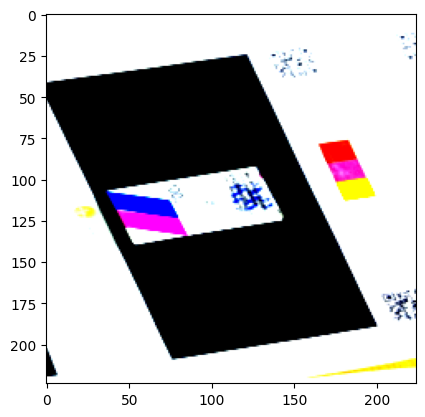

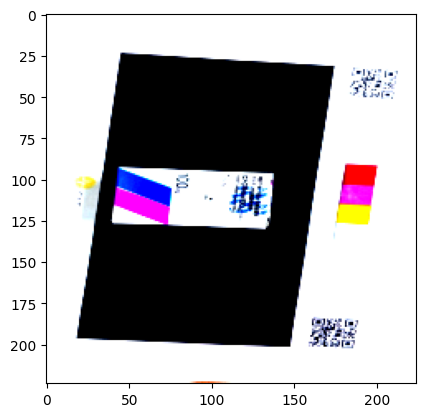

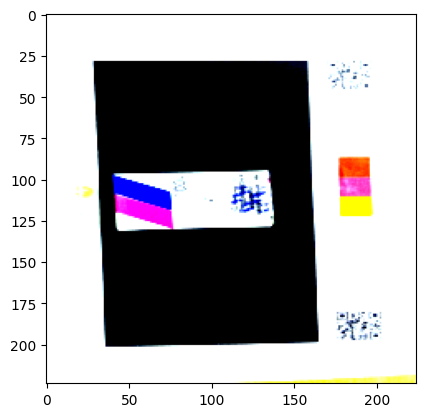

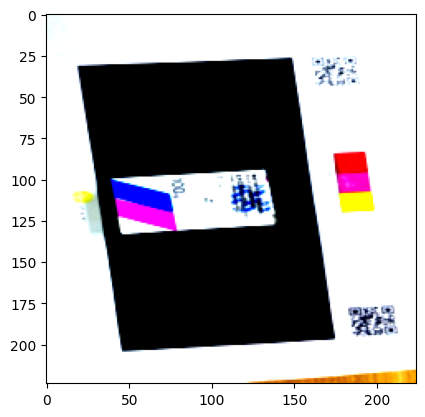

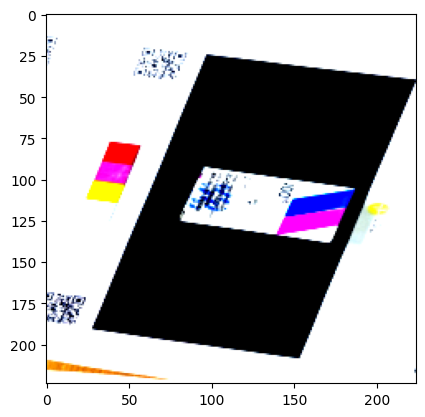

In [ ]:
# Process and show the image
def process_and_add_augmentations(img_path, images_dict):

    img2vec = Img2VecResnet18()  # Create an instance of the img2vec model from above class

    # Load and display the image
    img = plt.imread(img_path)
    img_product_name = get_product_name(img_path, images_dict)
    print()
    print(img_product_name)
    plt.imshow(img)
    plt.show()

    for _ in range(10):
        new_img = img2vec.preprocess_image(img, aug=True).cpu().numpy().squeeze(0).transpose(1, 2, 0)
        plt.imshow(new_img.clip(0, 1))
        plt.show()

image_path = '/content/drive/MyDrive/Data Science/CatAI/download/00bd42c9-c6c8-440e-87af-3bab36a1017e-image-0.jpg'
process_and_add_augmentations(image_path, images_dict)

# Process images and build Annoy index

In [16]:
%pip install -qU langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00


In [17]:
%pip install --upgrade --quiet  annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# %%time

# from annoy import AnnoyIndex

# # Assume img2vec is preloaded, and img is the current image (as a NumPy array)
# # Also, ensure img2vec.getVectors() and annoy_index are already initialized

# # Define the dimension of the feature vector (needed for AnnoyIndex)
# VECTOR_DIM = 512  # Replace with the actual dimension of your img2vec model
# annoy_index = AnnoyIndex(VECTOR_DIM, metric='angular')  # Annoy index initialization

# # Process the image
# def process_and_add_to_annoy(index, img, img2vec, images_dict, item_id, aug_num=10):
#     """
#     Processes the image, extracts a normalized vector, and adds it to the Annoy index.
#     Then applies augmentations aug_num times, processes images, extracts embeddings
#     and adds it to the Annoy index.

#     Args:
#         index (AnnoyIndex): The Annoy index object.
#         img (np.ndarray): The input image as a NumPy array (H, W, C).
#         img2vec (Img2VecResnet18): The img2vec model instance with a `getVectors` method.
#         images_dict (dict): The dictionary with images IDs and corresponding lists of images with metadata.
#         item_id (int): The unique ID for this item in the Annoy index.
#         aug_num (int): The number of augmentations applied.
#     """
#     # Transpose the image to match PyTorch model input (C, H, W)
#     # transposed_img = torch.from_numpy(np.transpose(img, (2, 0, 1))).float()

#     # Extract the feature vector using img2vec
#     vector = img2vec.getVectors(img)

#     # Normalize the vector
#     vector /= np.linalg.norm(vector)

#     # Add the normalized vector to the Annoy index
#     index.add_item(item_id, vector)

#     # Apply augmentations
#     for i in range(1, aug_num+1):
#         augmented_img = img2vec.preprocess_image(img, aug=True).cpu().numpy().squeeze(0).transpose(1, 2, 0)
#         vector = img2vec.getVectors(augmented_img, aug=False)
#         vector /= np.linalg.norm(vector)
#         index.add_item(item_id+i, vector)
#         image_list.insert(item_id+i, augmented_img)

# image_list = list(image_files)

# for i in range(len(image_list)):

#     # Create an instance of the img2vec model from above class
#     img2vec = Img2VecResnet18()

#     # Load the image
#     img = plt.imread(image_list[i])

#     # Process the image using img2vec model
#     process_and_add_to_annoy(annoy_index, img, img2vec, image_list, i*11) # 11 = aug_num+1

# num_trees = 50

# # Build the index for efficient searching
# annoy_index.build(num_trees)
# annoy_index.save('test.ann')

In [18]:
from annoy import AnnoyIndex

# Assume img2vec is preloaded, and img is the current image (as a NumPy array)
# Also, ensure img2vec.getVectors() and annoy_index are already initialized

# Define the dimension of the feature vector (needed for AnnoyIndex)
VECTOR_DIM = 512  # Replace with the actual dimension of your img2vec model
annoy_index = AnnoyIndex(VECTOR_DIM, metric='angular')  # Annoy index initialization

# Process the image
def process_and_add_to_annoy(index, img, img2vec, item_id):
    """
    Processes the image, extracts a normalized vector, and adds it to the Annoy index.
    Then applies augmentations aug_num times, processes images, extracts embeddings
    and adds it to the Annoy index.

    Args:
        index (AnnoyIndex): The Annoy index object.
        img (np.ndarray): The input image as a NumPy array (H, W, C).
        img2vec (Img2VecResnet18): The img2vec model instance with a `getVectors` method.
        item_id (int): The unique ID for this item in the Annoy index.
    """
    # Transpose the image to match PyTorch model input (C, H, W)
    # transposed_img = torch.from_numpy(np.transpose(img, (2, 0, 1))).float()

    # Extract the feature vector using img2vec
    vector = img2vec.getVectors(img)

    # Normalize the vector
    vector /= np.linalg.norm(vector)

    # Add the normalized vector to the Annoy index
    index.add_item(item_id, vector)

In [20]:
%%time

# Process all images, add augmentations, append to images_dict and to annoy index

item_id = 0 # start annoy index at 0

# Initialize the class with ONNX LASA model path
lasa_model_path = '/content/drive/MyDrive/Data Science/CatAI/LASAOD.onnx'
img2vec = Img2VecResnet18(
    batch_size=64,
    augment_prob=0.5,
    onnx_model_path=lasa_model_path
)

for image_id, image_files in images_dict.items():

    for i in range (len(image_files)):

        # Load the image
        img_path = image_files[i]['filename']
        img = plt.imread(img_path)
        img_product_name = get_product_name(img_path, images_dict)

        # Process the image using img2vec model
        process_and_add_to_annoy(annoy_index, img, img2vec, item_id)

        # Add item_id to metadata
        images_dict[image_id][i]['annoy_item_id'] = item_id

        # Increment item_id
        item_id += 1

        # Add 10 augmentations
        for _ in range(10):
            augmented_img = img2vec.preprocess_image(img, aug=True).cpu().numpy().squeeze(0).transpose(1, 2, 0)
            process_and_add_to_annoy(annoy_index, augmented_img, img2vec, item_id)
            images_dict[image_id].append({'filename': '',
                                          'ProductName': img_product_name,
                                          'annoy_item_id': item_id,
                                          'img_array': augmented_img
                                          })
            item_id += 1

num_trees = 50

# Build the index for efficient searching
annoy_index.build(num_trees)
annoy_index.save('test.ann')

Exception: You can't add an item to a loaded index

# Find the nearest neighbors for a specific image

In [21]:
%%time

annoy_index = AnnoyIndex(VECTOR_DIM, metric='angular')
annoy_index.load('test.ann') # super fast, will just mmap the file
print(annoy_index.get_nns_by_item(0, 15)) # will find the 15 nearest neighbors

[0, 77, 231, 11, 22, 286, 187, 1045, 550, 297, 132, 605, 1034, 737, 638]
CPU times: user 957 µs, sys: 870 µs, total: 1.83 ms
Wall time: 2.04 ms


In [22]:
image_path = '/content/drive/MyDrive/Data Science/CatAI/download/00bd42c9-c6c8-440e-87af-3bab36a1017e-image-0.jpg'
img = plt.imread(image_path)
vector = img2vec.getVectors(img)
vector /= np.linalg.norm(vector)

idx, _ = annoy_index.get_nns_by_vector(vector, 6, search_k=-1, include_distances=True)
print(idx)

[0, 77, 231, 11, 22, 286]



hCRH « TANABE » Injection 100 mcg


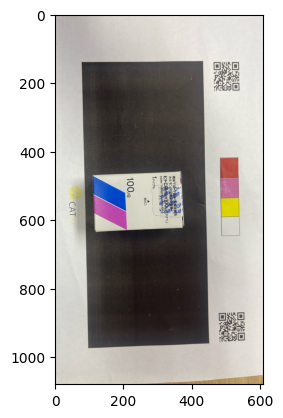


hCRH « TANABE » Injection 100 mcg


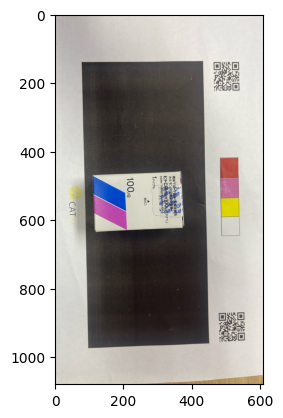


Zavedos 10mg


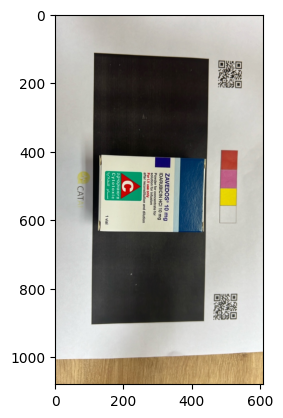


Cystistat


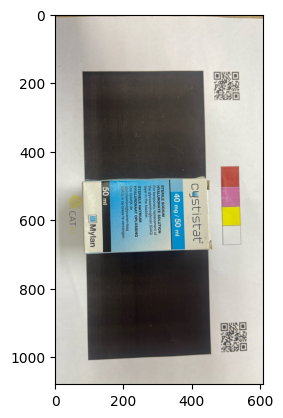


hCRH « TANABE » Injection 100 mcg


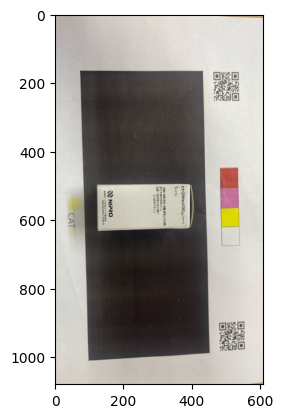


hCRH « TANABE » Injection 100 mcg


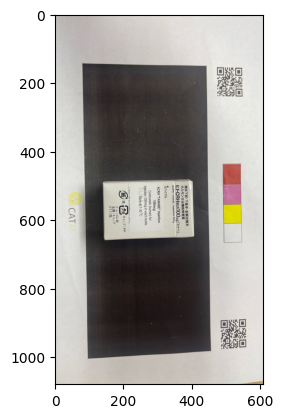


Zoledronic acid Seacross 4mg/5ml


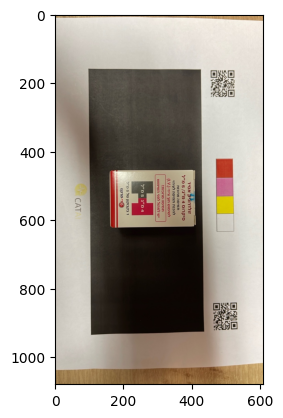

In [24]:
# Function to find the nearest neighbor of an image
def find_image(img_path, images_dict):
    # Create an instance of the img2vec model from above class
    img2vec = Img2VecResnet18(
        batch_size=64,
        augment_prob=0.5,
        onnx_model_path=lasa_model_path
        )

    # Load and display the image
    img = plt.imread(img_path)
    img_product_name = get_product_name(img_path, images_dict)
    print()
    print(img_product_name)
    plt.imshow(img)
    plt.show()

    # Process the image using img2vec model
    # transposed_img = torch.from_numpy(np.transpose(img, (2, 0, 1))).float()
    vector = img2vec.getVectors(img)
    vector /= np.linalg.norm(vector)

    # Find nearest neighbor using the Annoy index
    idx, _ = annoy_index.get_nns_by_vector(vector, 6, search_k=-1, include_distances=True)

    # Load and display the nearest neighbor images from embeddings
    for annoy_item_id in idx:
        for image_id, image_files in images_dict.items():
            for i in range(len(image_files)):
                if image_files[i]['annoy_item_id'] == annoy_item_id:
                    product_name = image_files[i]['ProductName']
                    if image_files[i]['filename'] != '':
                        nearest_neighbor_img = plt.imread(image_files[i]['filename'])
                        print()
                        print(product_name)
                        plt.imshow(nearest_neighbor_img)
                        plt.show()
                    else:
                        print()
                        print(product_name)
                        plt.imshow(image_files[i]['img_array'])
                        plt.show()

# Replace 'image_path.jpg' with the actual path of the image you want to search
image_path = '/content/drive/MyDrive/Data Science/CatAI/download/00bd42c9-c6c8-440e-87af-3bab36a1017e-image-0.jpg'
find_image(image_path, images_dict)

In [26]:
# print(images_dict['00bd42c9-c6c8-440e-87af-3bab36a1017e'])
# print(len(images_dict['00bd42c9-c6c8-440e-87af-3bab36a1017e']))